# 💎 **Diamond Price Prediction: The 4C Model**

# 📚 1. INTRODUCTION
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section provides an overview of the dataset and the problem we are trying to solve. We will also discuss the methodology and the tools we will use to solve the problem.

</div>

### **Overview**

The Diamond Price Prediction project aims to build a machine learning model that accurately estimates the price of a diamond based on its attributes such as carat, cut, color, clarity, depth, and dimensions. The project will involve data collection, preprocessing, feature engineering, model training, and deployment through a Streamlit web application.

Link to Dataset: https://www.kaggle.com/datasets/willianoliveiragibin/type-of-the-diamond

### **Objectives**
**Exploratory Data Analysis:**  
- Perform statistical analysis and visualizations to understand relationships between attributes.
- Handle missing values, outliers, and categorical encoding for machine learning.

**Model Development:**
- Engineer new features (e.g., price per carat, light reflection efficiency, etc.) to improve model accuracy.
- Train regression models (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting, XGBoost) to predict diamond prices.
- Perform hyperparameter tuning and evaluate models using RMSE, MAE, and R² scores.
- Select the best-performing model for deployment.

**Model Deployment:**
- Develop an interactive Streamlit web app where users can input diamond attributes and receive a predicted price.
- Deploy the app on Streamlit Community Cloud or another hosting service.


### **Library**

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# 📚 2. DATA PROCESSING
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section will focus on data preprocessing, including handling missing values, and encoding categorical variables. We will also perform exploratory data analysis to understand the distribution of attributes and relationships between them.

</div>

In [3]:
df = pd.read_csv('data.csv')
df

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58
...,...,...,...,...,...,...,...,...,...,...
53935,Very Good,E,VS2,0.70,62.8,60.0,2755,5.59,3.53,5.65
53936,Very Good,D,VS1,0.70,63.1,59.0,2755,5.67,3.55,5.58
53937,Very Good,E,VS2,0.70,60.5,59.0,2757,5.71,3.47,5.76
53938,Very Good,E,VS2,0.70,61.2,59.0,2757,5.69,3.49,5.72


In [4]:
#  check for the data types of the columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.shape

(53940, 10)

In [6]:
# rename the columns
df.rename(columns={
    'x (Premium)':'x_factor',
    'y (Good)':'y_factor',
    'z (Very Good)':'z_factor'}, inplace=True)


In [7]:
# check the convert the data types of the columns
df.columns.to_list()

['cut',
 'color',
 'clarity',
 'carat',
 'depth',
 'table',
 'price',
 'x_factor',
 'z_factor',
 'y_factor']

In [8]:
# check for the missing values
df.isnull().sum()

cut         0
color       0
clarity     0
carat       0
depth       0
table       0
price       0
x_factor    0
z_factor    0
y_factor    0
dtype: int64

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
numerical_columns

['carat', 'depth', 'table', 'price', 'x_factor', 'z_factor', 'y_factor']

In [11]:
categorical_columns

['cut', 'color', 'clarity']

# 📚 3. EXPLORATORY DATA ANALYSIS
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section will focus on data visualization and statistical analysis to understand the distribution of attributes and relationships between them. We will use plots such as histograms, scatter plots, and correlation matrices to identify patterns and trends in the data.

</div>

## **Data Visualization**: Categorical Attributes

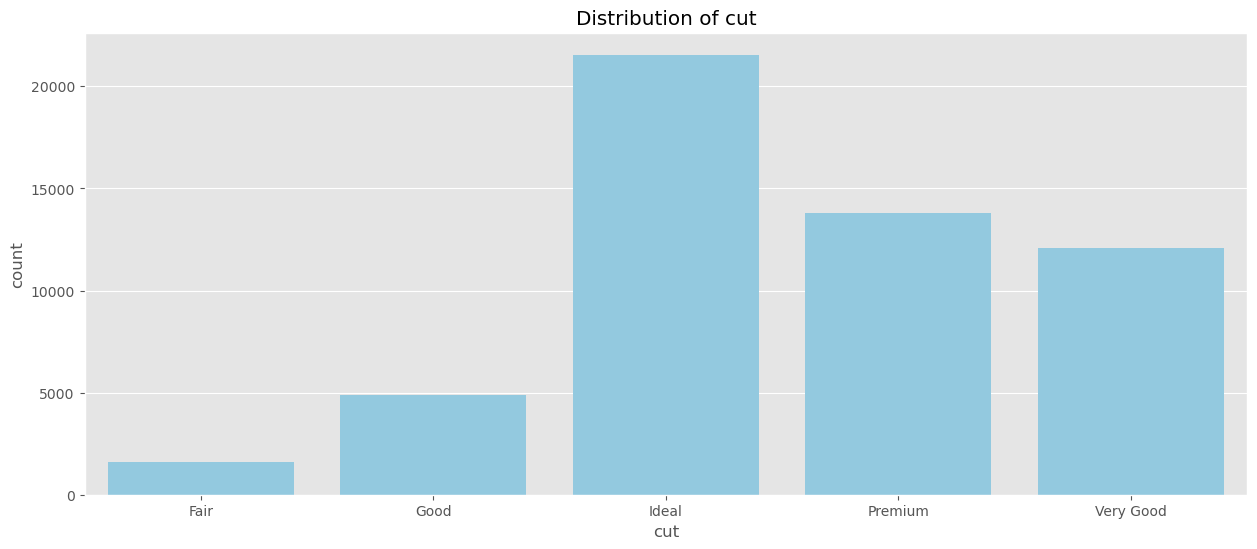

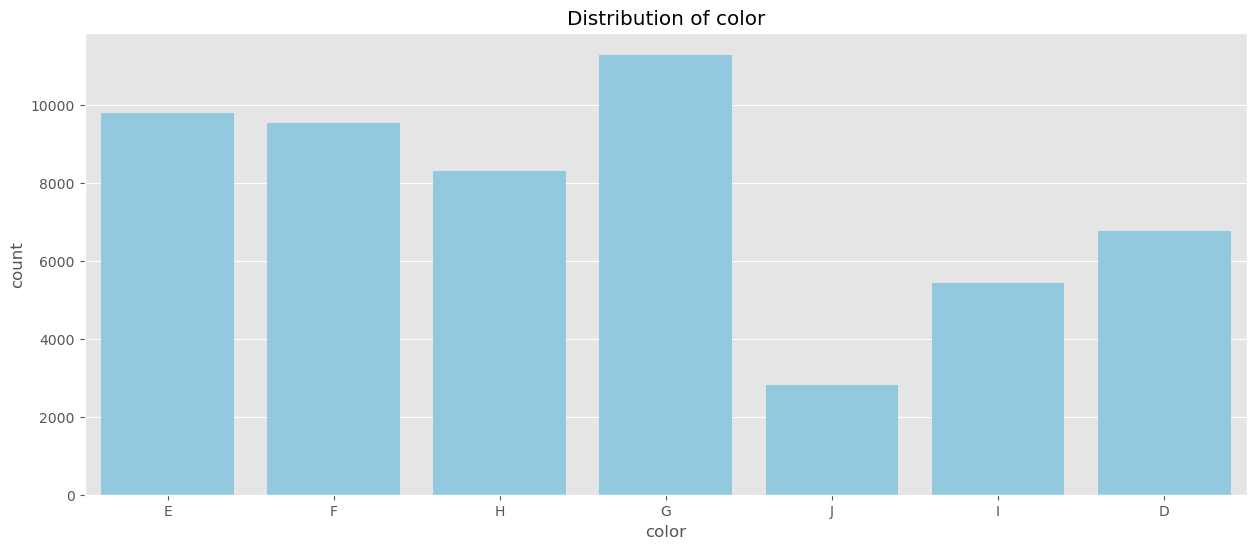

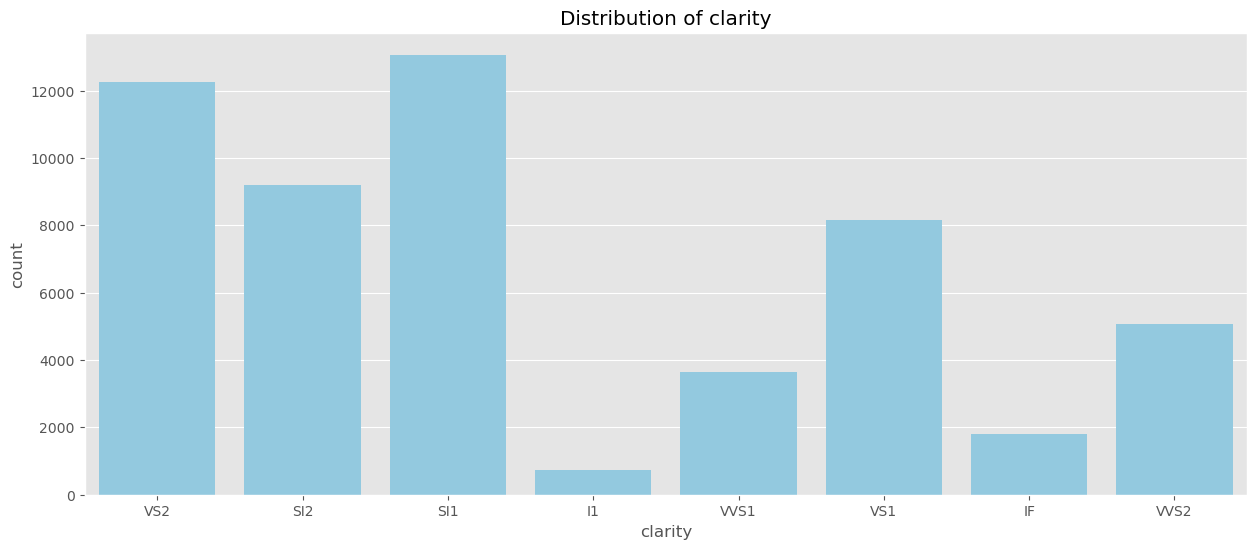

In [12]:
for col in categorical_columns:
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.countplot(x=col, data=df, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

Insight: The distribution of the categorical columns is not balanced. This may affect the performance of the model.
Therefore, we will need to encode these categorical columns to numerical values before training the model.

____

## **Data Visualization**: Numerical Attributes

### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">1. Summary Statisitcs</h2>

In [13]:
# exploring the statistics of the numerical columns
df[numerical_columns].describe().round(2)

,carat,depth,table,price,x_factor,z_factor,y_factor
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,3.54,5.73
std,0.47,1.43,2.23,3989.44,1.12,0.71,1.14
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,2.91,4.72
50%,0.70,61.80,57.00,2401.00,5.70,3.53,5.71
75%,1.04,62.50,59.00,5324.25,6.54,4.04,6.54
max,5.01,79.00,95.00,18823.00,10.74,31.80,58.90


**insight:**    
The mean price of diamonds is around 3933, and while the mean carat weight is 0.8, the mean depth percentage is 61.7. The standard deviation of price is quite high, indicating a wide range of prices in the dataset. The carat weight also has a large standard deviation, suggesting a wide range of carat weights in the dataset. the high standard deviation of price and carat weight indicates that the data is spread out over a wide range of values.

___

### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">2. KDE visualisation</h2>

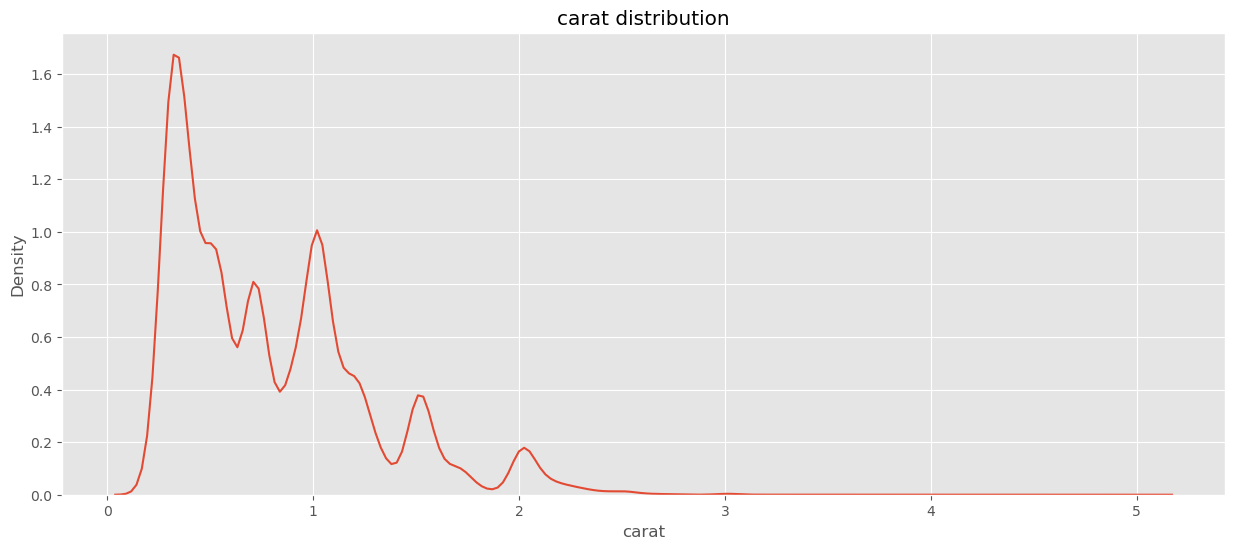

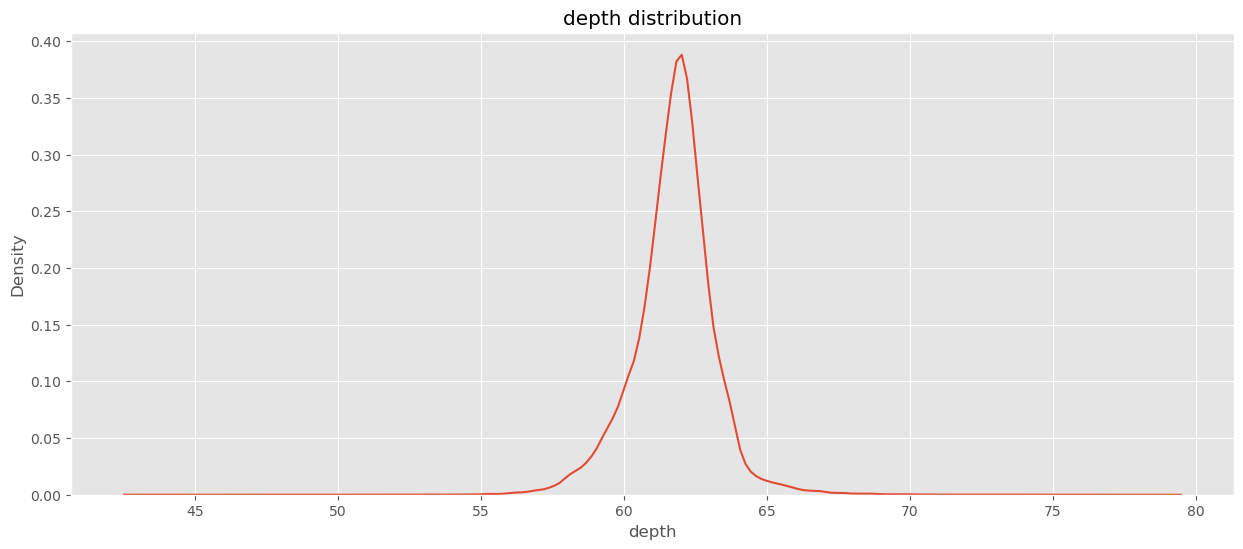

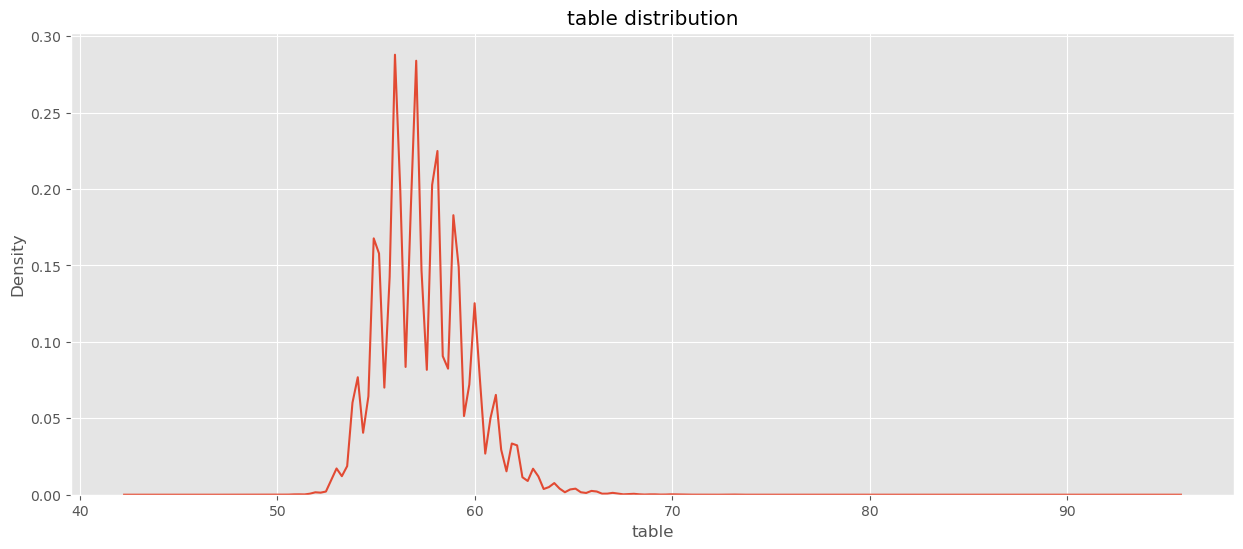

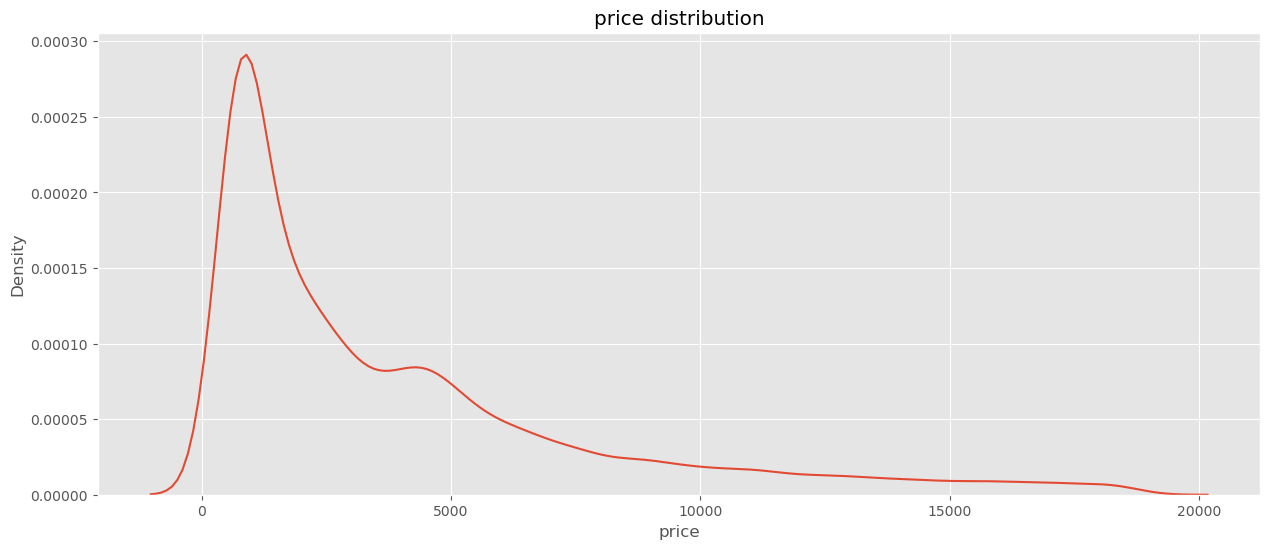

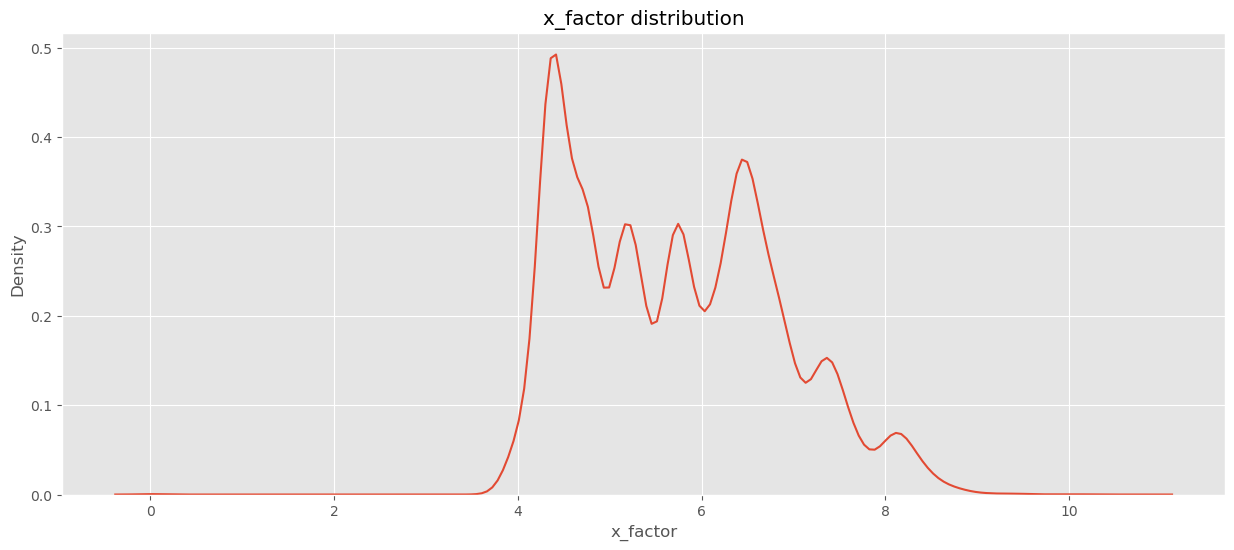

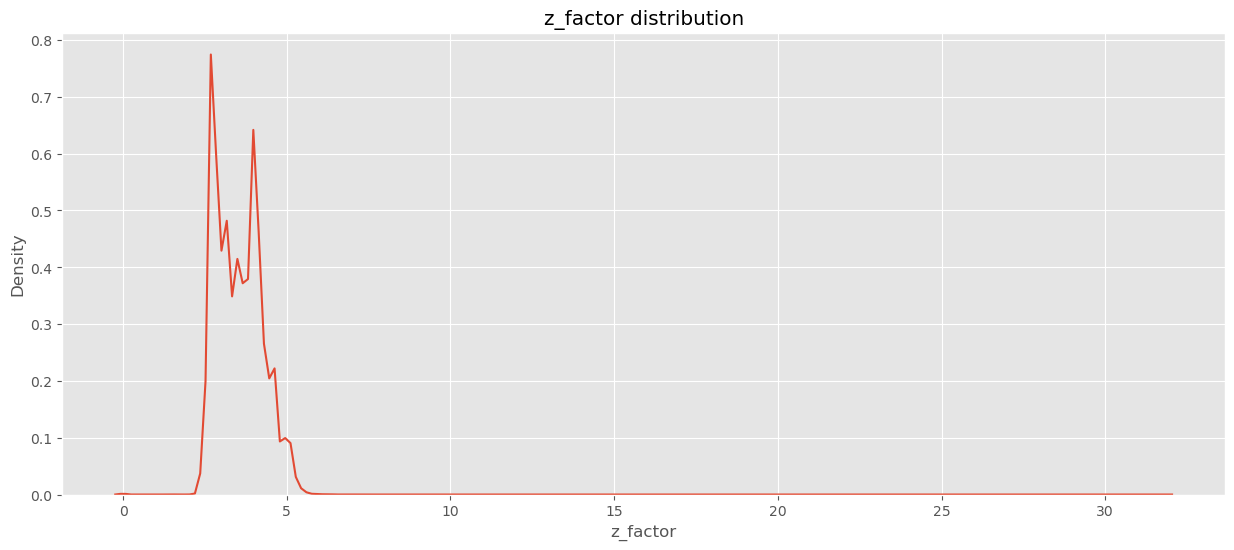

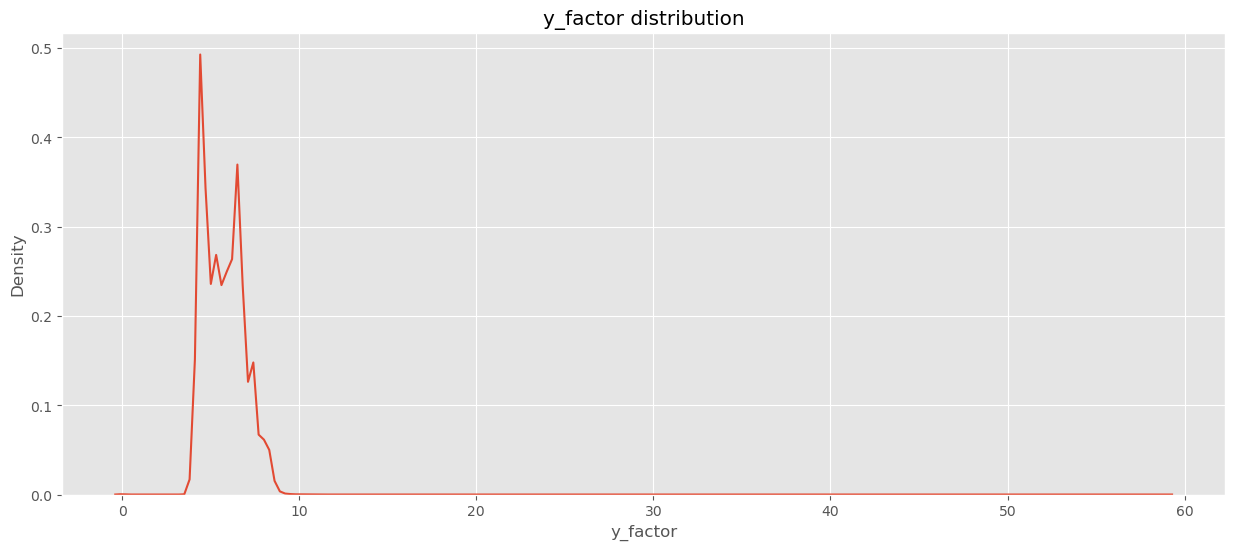

In [14]:
# plotting the  kde for the numerical columns
for col in numerical_columns:
    plt.figure(figsize=(15,6), dpi=100, facecolor='w', edgecolor='k')
    sns.kdeplot(df[col])
    plt.title(f'{col} distribution')
    plt.show()

**Insight:**    
From the diagram above, we can see that the carat attribute has a right-skewed distribution, with most diamonds having a carat weight of less than 1. The price attribute also has a right-skewed distribution, with most diamonds priced below $5,000. The depth and table attributes have relatively normal distributions, with depth ranging from 55 to 70 and table ranging from 50 to 70.

___

### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">3. Outliers of attributes</h2>

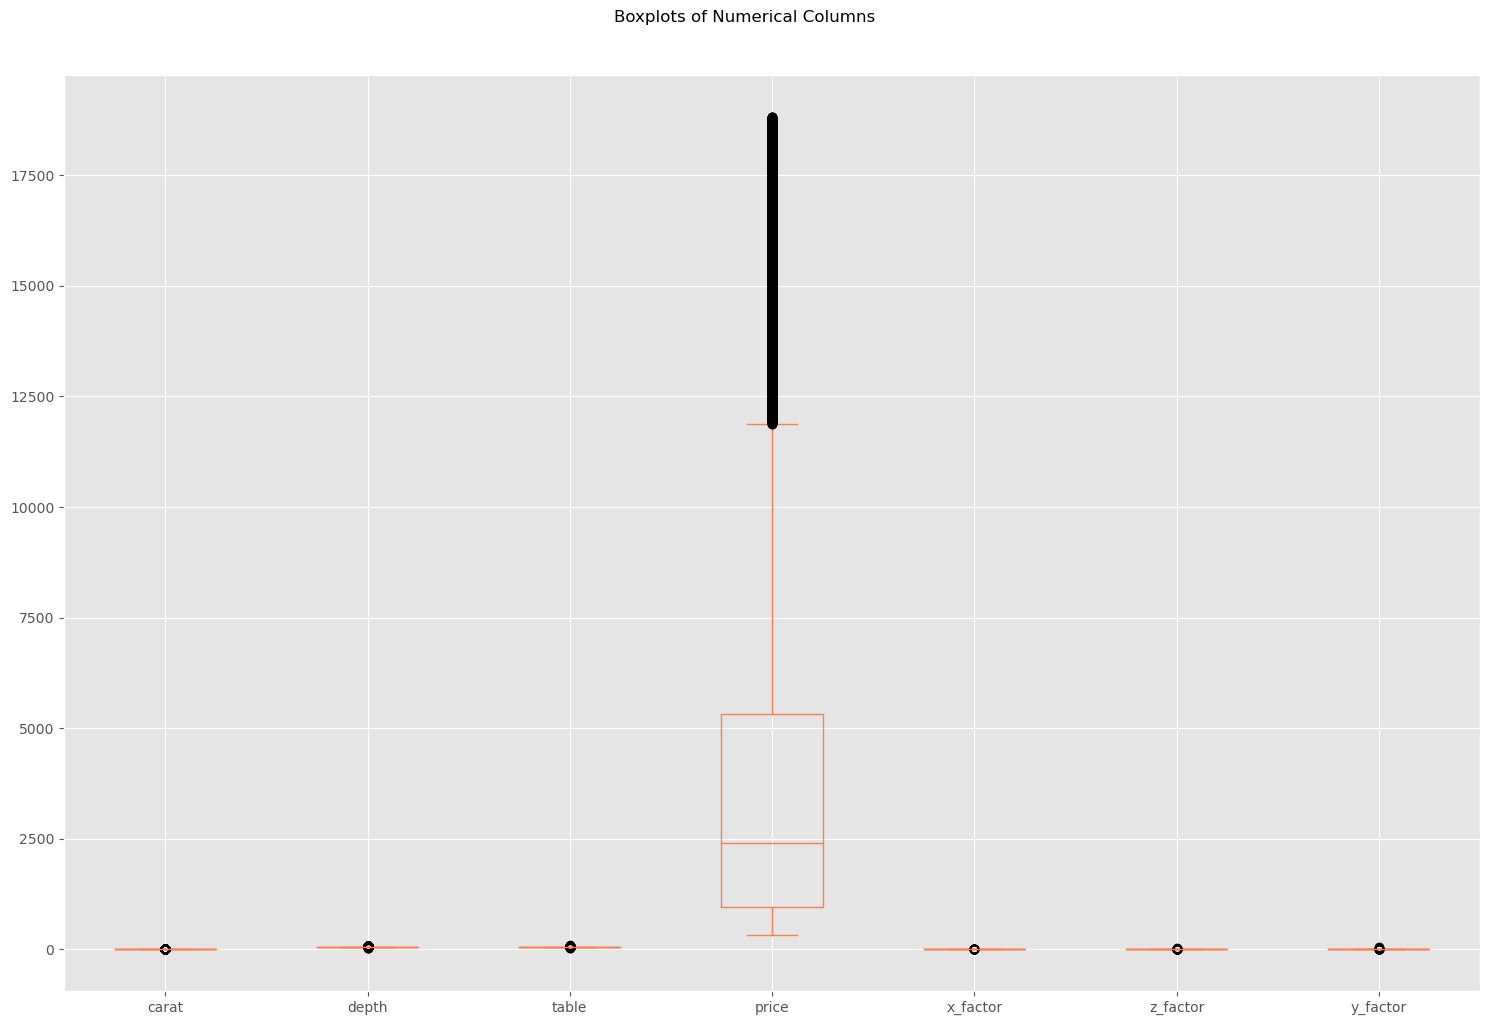

In [15]:
df[numerical_columns].boxplot(figsize=(15,10), color='coral')
plt.suptitle('Boxplots of Numerical Columns', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

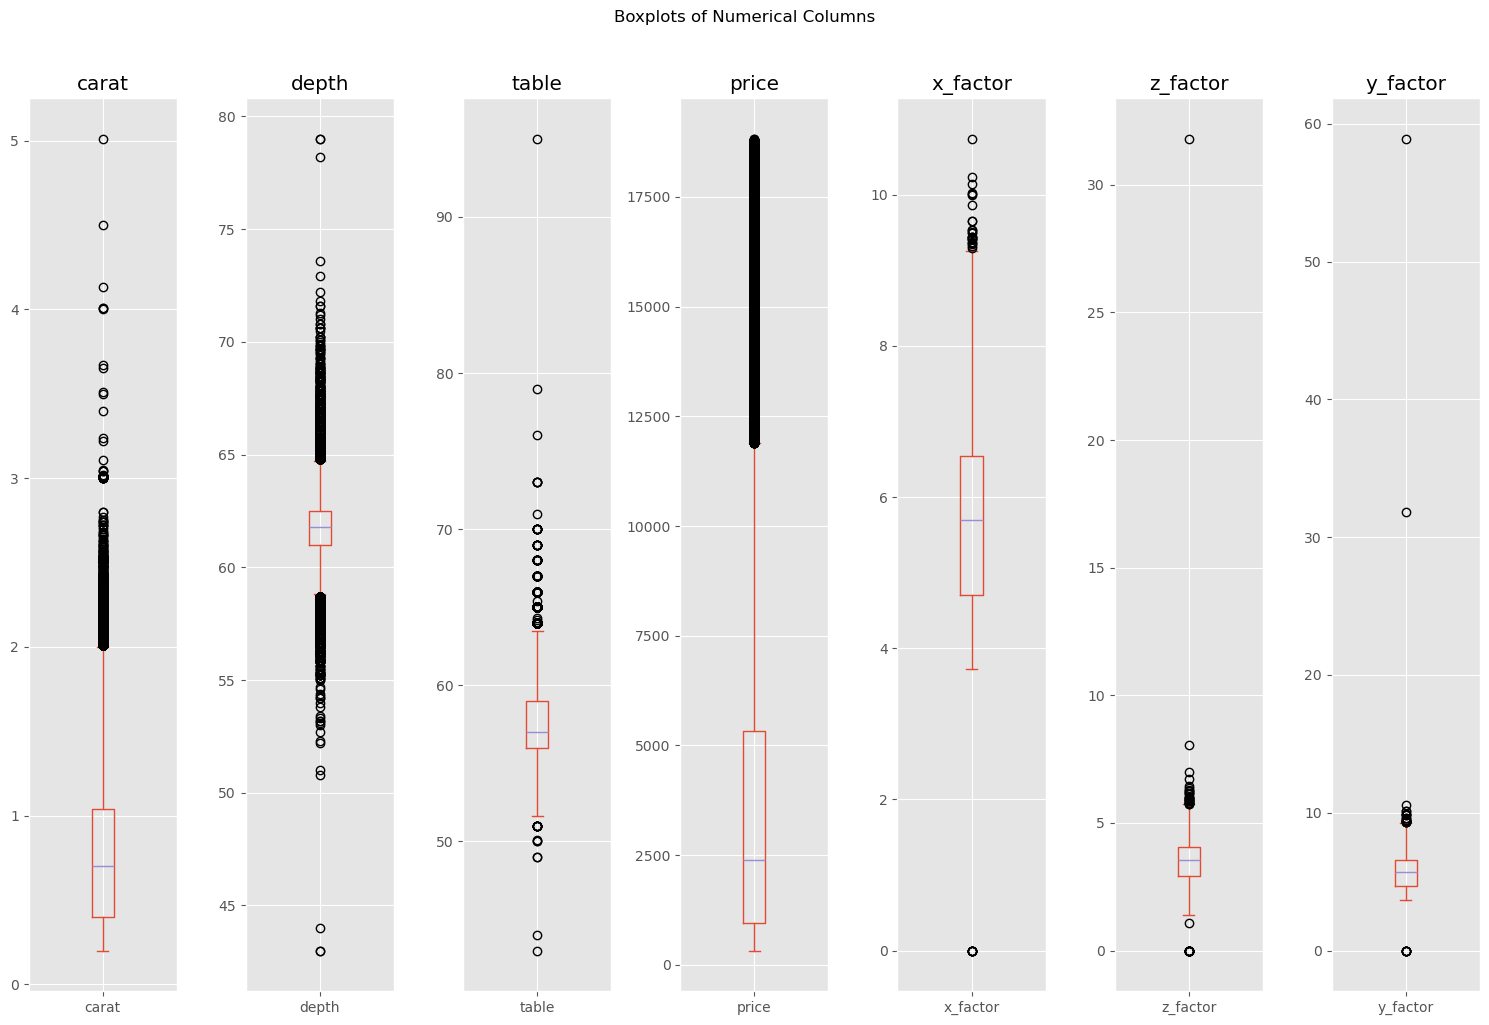

In [16]:
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 10))
plt.suptitle('Boxplots of Numerical Columns', x=0.5, y=1.02, ha='center', fontsize='large')
for i, column in enumerate(numerical_columns):
    df[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

Insights:
- The price has an outlier at $18,823, which may need further investigation.

____

### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">4. Correlation of attributes</h2>

In [17]:
corr_matrix = df[numerical_columns].corr().round(2)
corr_matrix

,carat,depth,table,price,x_factor,z_factor,y_factor
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,0.09,-0.03
table,0.18,-0.30,1.00,0.13,0.20,0.15,0.18
price,0.92,-0.01,0.13,1.00,0.88,0.86,0.87
x_factor,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
z_factor,0.95,0.09,0.15,0.86,0.97,1.00,0.95
y_factor,0.95,-0.03,0.18,0.87,0.97,0.95,1.00


In [18]:
corr_matrix['price'].sort_values(ascending=False)

price       1.00
carat       0.92
x_factor    0.88
y_factor    0.87
z_factor    0.86
table       0.13
depth      -0.01
Name: price, dtype: float64

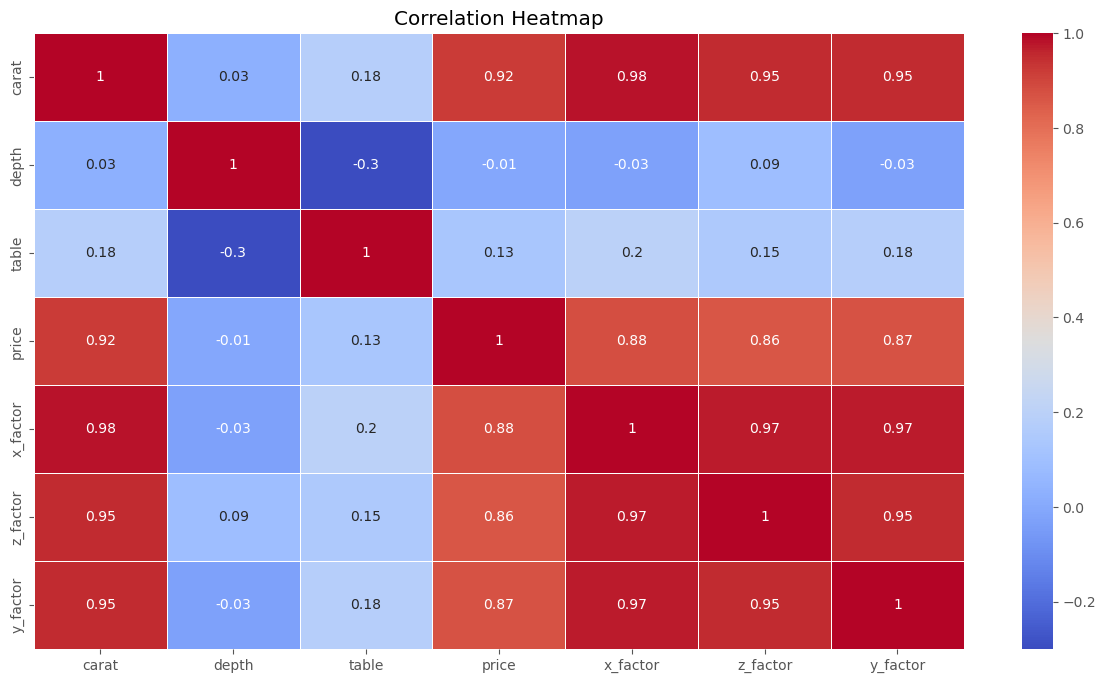

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insights:
- The carat attribute has a strong positive correlation with the price attribute, indicating that larger diamonds tend to be more expensive.
- The depth and table attributes have weak correlations with the price attribute, suggesting that they may not be significant predictors of diamond price.
- The x, y, and z attributes have positive correlations with the price attribute, indicating that larger dimensions tend to be associated with higher prices.

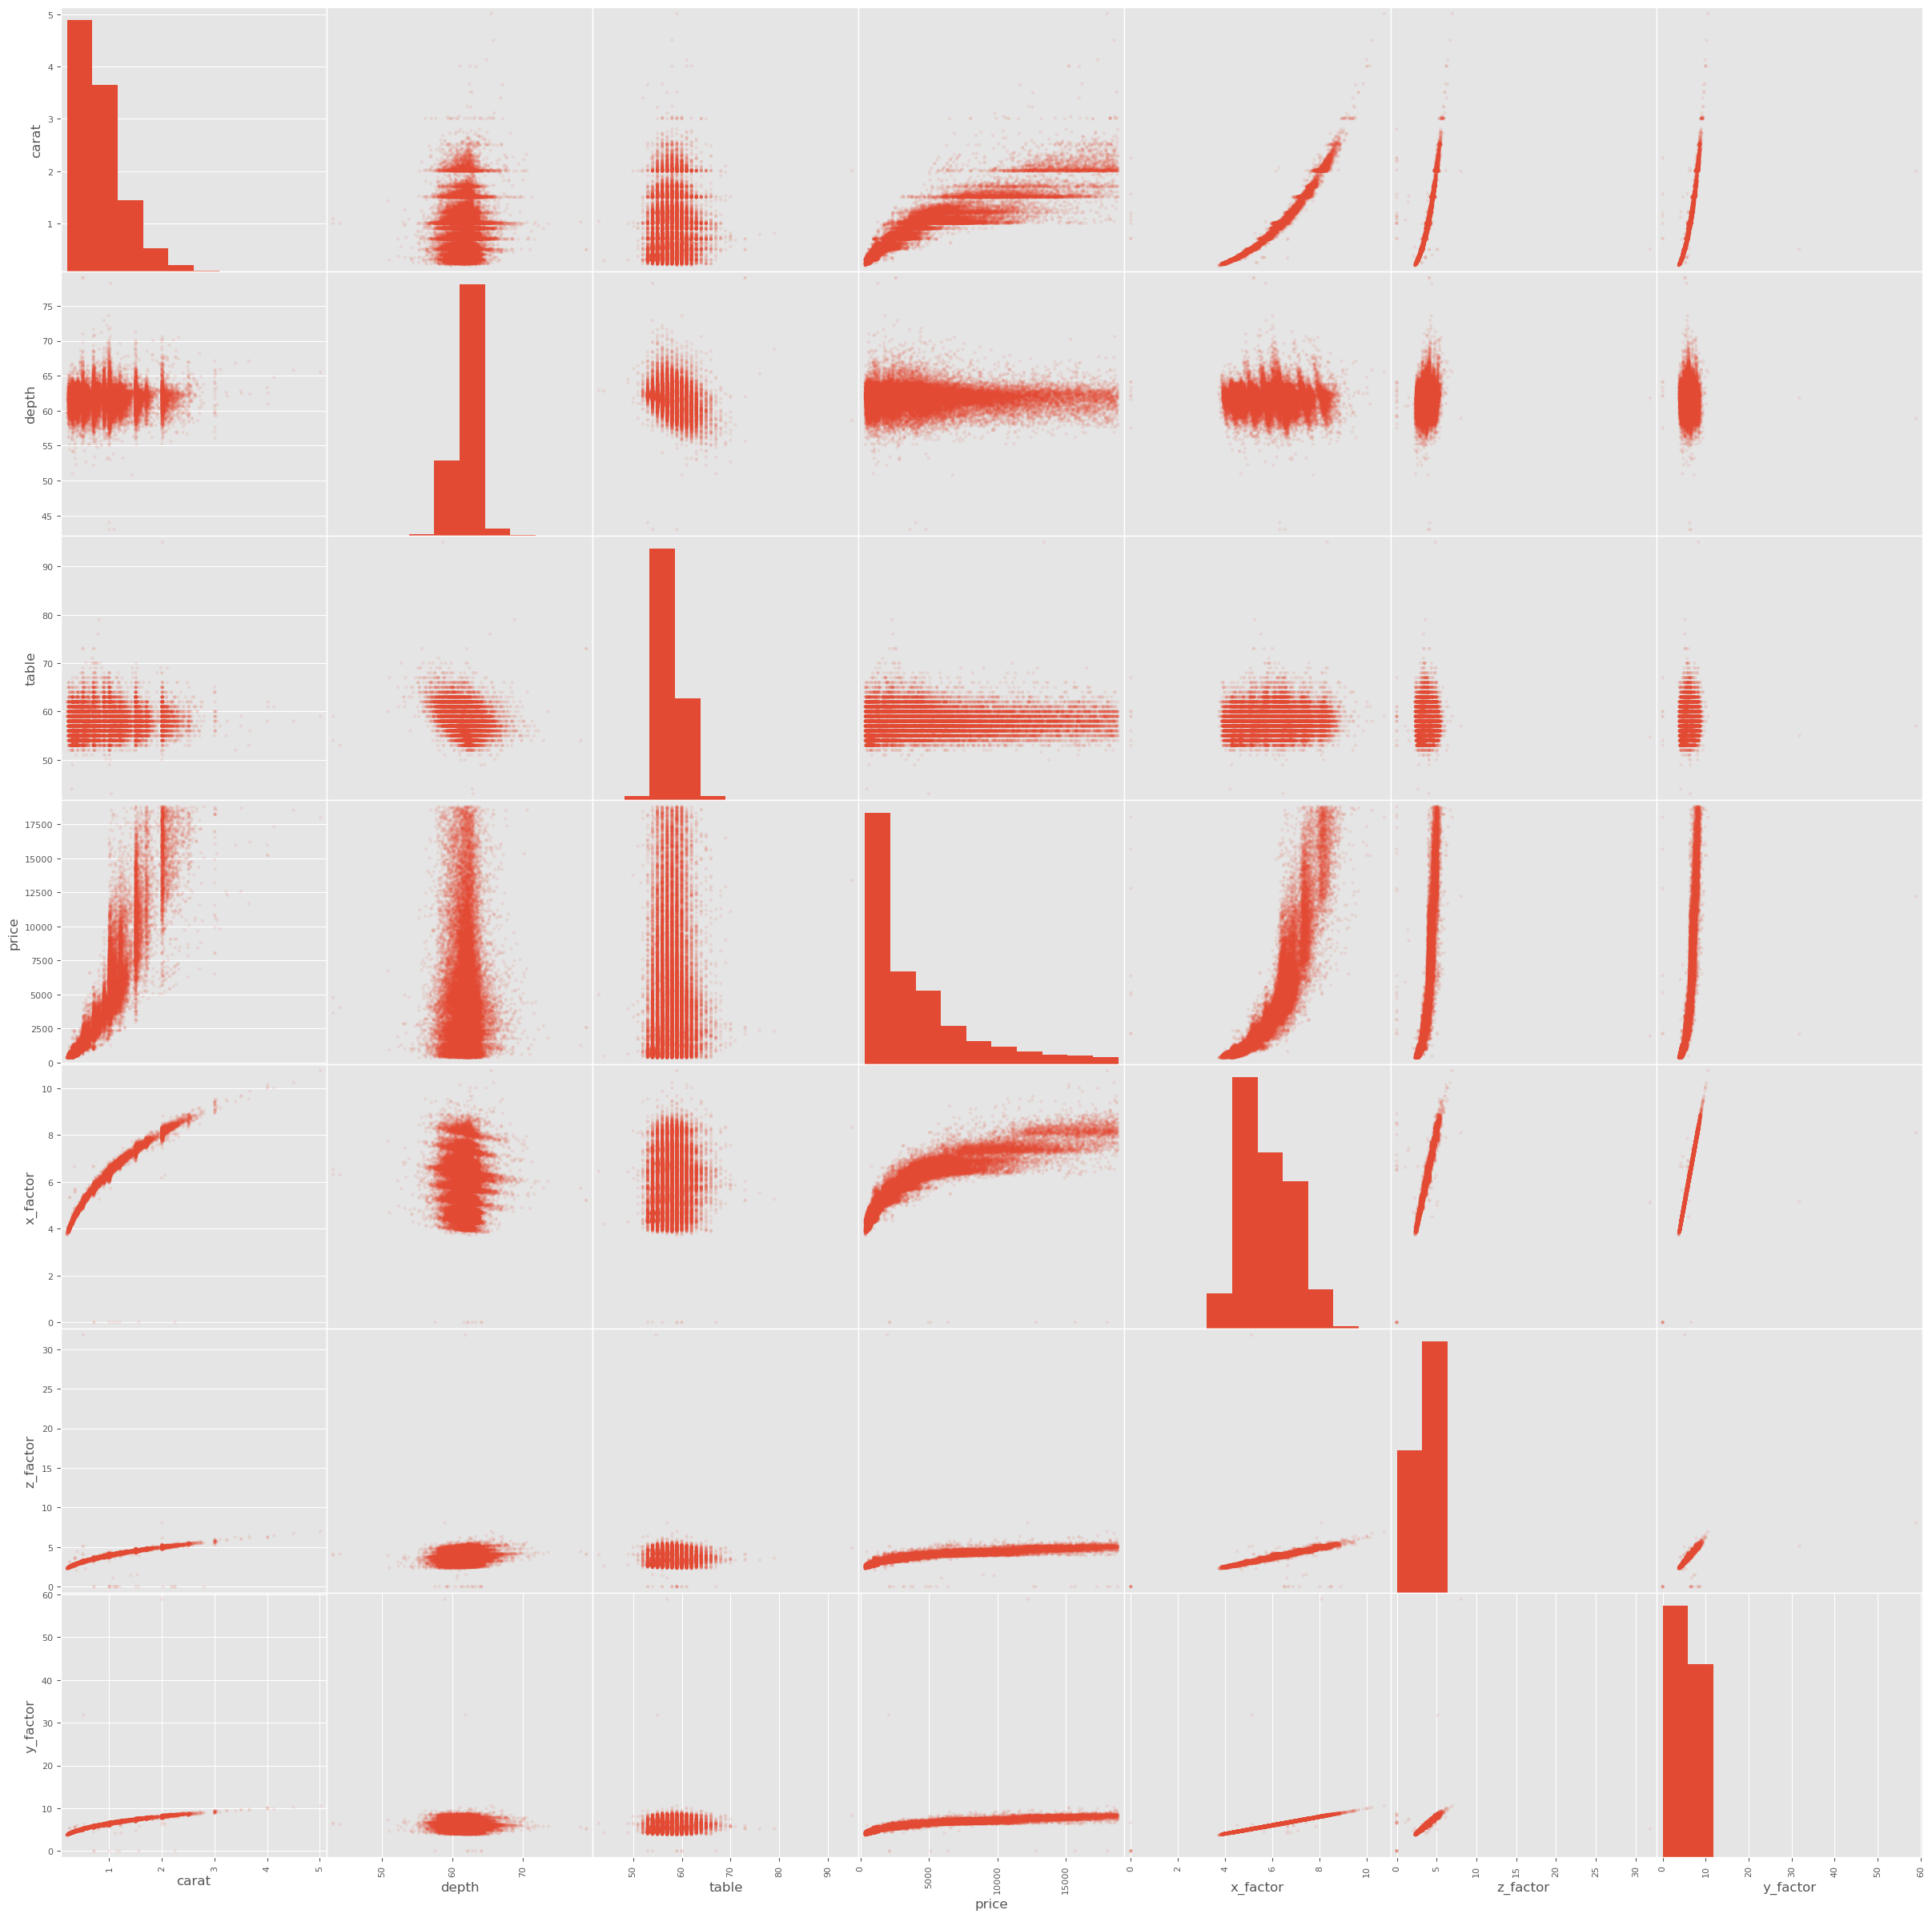

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[numerical_columns], figsize=(30, 30), alpha=0.1)
plt.show()

Therefore, it is insightful to consider the carat , and x attributes as a key predictor of diamond price in the model, and this can be visualise in the scatter plot below.

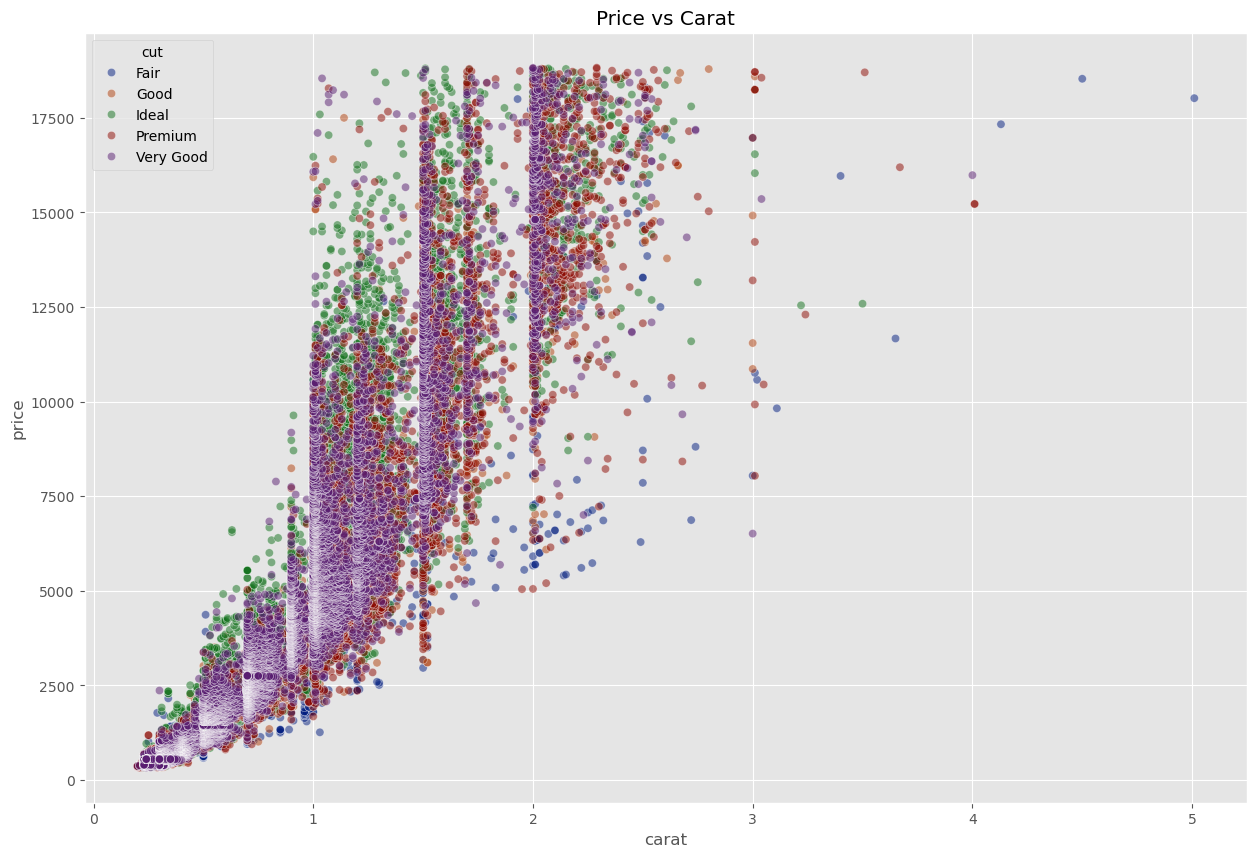

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.scatterplot(data=df, x='carat', y='price', hue='cut', alpha=0.5, ax=ax, palette='dark')
plt.title('Price vs Carat')
plt.show()

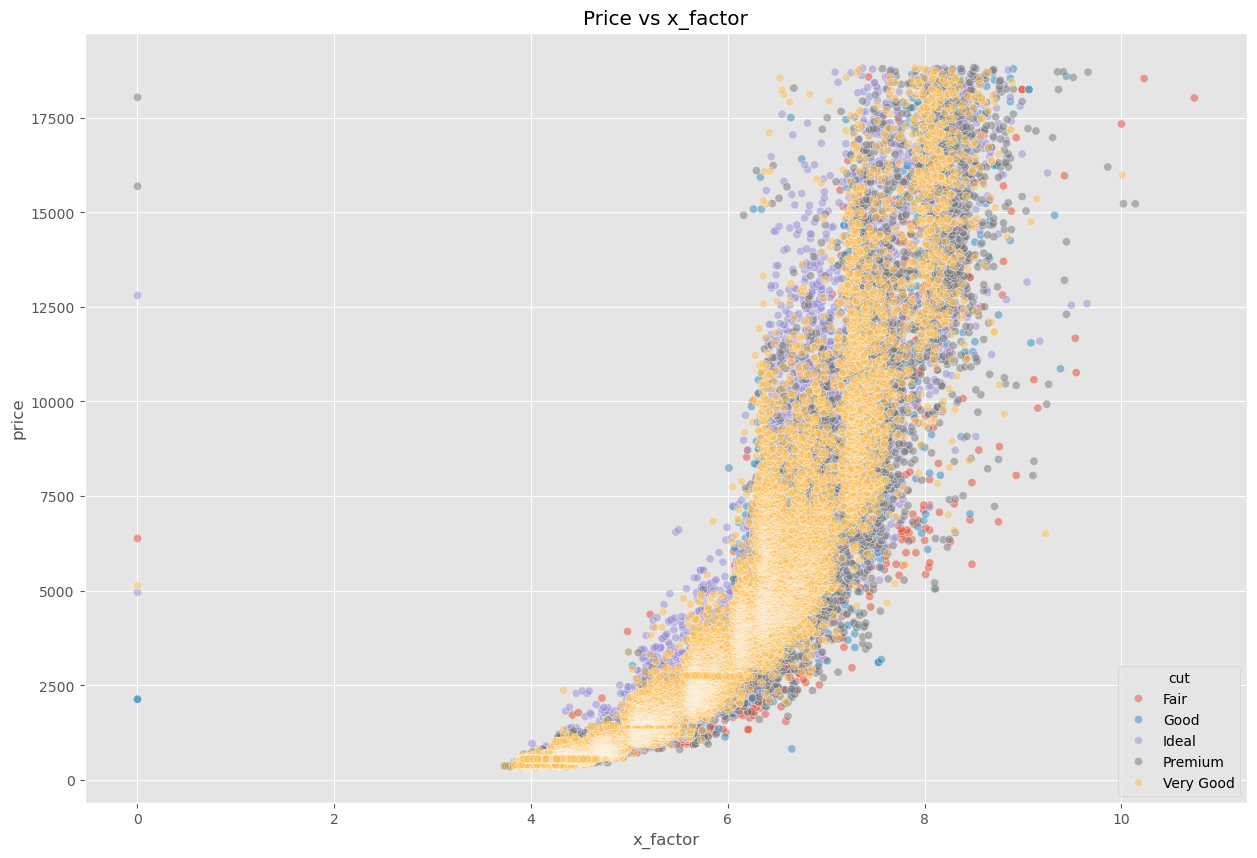

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.scatterplot(data=df, x='x_factor', y='price', hue='cut', alpha=0.5, ax=ax)
plt.title('Price vs x_factor')
plt.show()

___

## **Data Visualization:** Target Variable (Price)

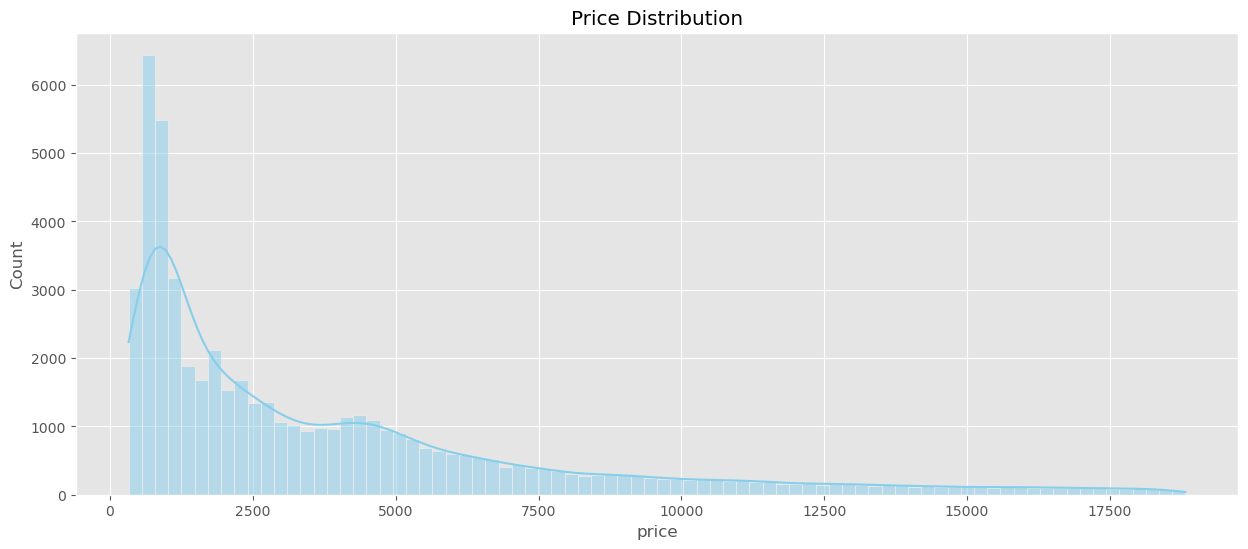

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title('Price Distribution')
plt.show()


Insight: The price attribute has a right-skewed distribution, with most diamonds priced below $5,000. This may require transformation to improve model performance.

# 📚 4. SETTING UP THE VALIDATION FRAMEWORK
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section will focus on setting up the validation framework for training and evaluating machine learning models. We will split the data into training and testing sets, define evaluation metrics, and implement cross-validation to assess model performance.

</div>

In [24]:
# import the model from the sklearn library
from sklearn.model_selection import train_test_split

# split the dataset into train and test dataset
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

# split the train dataset into train and validation dataset
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [25]:
len(df_train), len(df_val), len(df_test)

(32364, 10788, 10788)

In [26]:
# reset the index of the dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
# assigning the target variables to the y_train from the df_train
y_train = df_train['price'].values

# assigning the target variables to the y_test from the df_test
y_test = df_test['price'].values

# assigning the target variables to the y_val from the df_val
y_val = df_val['price'].values

In [28]:
# drop the target variable from the dataset
del df_train['price']
del df_test['price']
del df_val['price']

In [29]:
df_train.head()

,cut,color,clarity,carat,depth,table,x_factor,z_factor,y_factor
0,Very Good,I,VS1,1.20,62.8,54.5,6.75,4.25,6.79
1,Ideal,F,VVS2,1.15,62.1,55.0,6.69,4.17,6.74
2,Premium,G,VS1,1.08,62.0,60.0,6.55,4.05,6.51
3,Ideal,F,VS2,0.32,62.2,55.0,4.35,2.71,4.37
4,Very Good,H,SI1,1.10,62.9,57.0,6.54,4.13,6.59


In [30]:
df_test.head()

,cut,color,clarity,carat,depth,table,x_factor,z_factor,y_factor
0,Ideal,H,VS2,1.62,62.4,57.0,7.48,4.68,7.53
1,Premium,F,SI2,1.01,61.7,58.0,6.46,3.97,6.41
2,Ideal,F,VVS2,0.54,61.0,54.0,5.28,3.23,5.30
3,Ideal,E,VS1,0.40,60.1,57.0,4.77,2.88,4.82
4,Premium,H,VS1,1.00,60.7,59.0,6.44,3.90,6.40


In [31]:
df_val.head()

,cut,color,clarity,carat,depth,table,x_factor,z_factor,y_factor
0,Premium,D,VS2,0.46,60.9,58.0,4.97,3.02,4.94
1,Ideal,E,VS2,0.36,62.6,56.0,4.52,2.84,4.56
2,Premium,E,VS1,0.39,58.8,59.0,4.76,2.79,4.73
3,Fair,J,VS1,0.90,64.6,58.0,6.12,3.93,6.06
4,Ideal,E,VS1,0.31,61.3,54.0,4.37,2.69,4.40


# 📚 5. FEATURES ENGINEERING
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section will focus on feature engineering, including creating new features, transforming existing features, and selecting relevant features for model training. We will also handle categorical encoding and feature scaling to prepare the data for machine learning.

</div>

# 📚 6. BUILDING AND TRAINING THE MODEL
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with ...

</div>

# 📚 7. EVALUATING THE MODEL
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with ...

</div>

# 📚 8. MODEL DEPLOYMENT
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with ...

</div>